<a href="https://colab.research.google.com/github/davidd138/davidd138-03MAIR_10_A_2020-21_Algoritmos-de-Optimizacion/blob/main/David_Perez_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Guiada 2 de Algoritmos de Optimización

David Pérez Martínez

https://colab.research.google.com/drive/13a8H087I4fDT8KOQ5FlalPC4At3hwsSu?usp=sharing

https://github.com/davidd138/davidd138-03MAIR_10_A_2020-21_Algoritmos-de-Optimizacion

###Viaje por el río

In [ ]:
import math 

TARIFAS = [
[0,5,4,3,999,999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

En primer lugar, he hecho un problema muy simple que partiendo del primer nodo elige siempre el nodo más cercano. El resultado no es el más óptimo pero no dista mucho. Si se aplica este método a otro problema con dimensionalidad mayor probablemente el resultado sea peor, pero el coste computacional es muy pequeño, en el peor de los casos el coste computacional es de cte*n, esto es lineal.

In [ ]:
def camino(tarifas, posicion=0, coste=0):
  posicion_actual=tarifas[posicion]
  corto=min(posicion_actual[posicion+1:])
  coste+=corto
  nueva_posicion=posicion_actual.index(corto)
  if nueva_posicion==6:
    print(coste)
    return coste
  else: 
    camino(tarifas, nueva_posicion, coste)

camino(TARIFAS)

12


En el siguiente método he utilizado la recursividad, creo que se puede asemejar un poco a ramificación y poda. Se va probando con todas las ramificaciones y cuando superan el costo de la más eficiente encontrada se descartan.

In [ ]:
MIN2=999999
def camino(tarifas, posicion=0, coste=0, recorrido=[0]):
  global MIN2
  posicion_actual=tarifas[posicion]
  #print(posicion_actual)
  coste1=[coste]*len(posicion_actual[posicion+1:])
  #recorrido1=[recorrido[:]*len(posicion_actual[posicion+1:])]
  recorrido1=[recorrido[:] for i in posicion_actual[posicion+1:]]
  #print(recorrido1)
  #print(coste1)
  #print(posicion_actual[posicion+1:])
  for m,i in enumerate(posicion_actual[posicion+1:]):
    #print(posicion_actual[posicion+1:])
    #print(m,i)
    coste1[m]+=i
    if coste1[m]>MIN2: continue
    #print(coste1[m])
    nueva_posicion=posicion+m+1
    #print(nueva_posicion)
    #print(recorrido1)
    #print(recorrido1[m])
    recorrido1[m].append(nueva_posicion)
    #print(recorrido1)
    #print(recorrido1[m])
    if nueva_posicion==6: 
      #print(recorrido1[m])
      #print(min2)
      if coste1[m]<=MIN2:
        MIN2=coste1[m]
        print(recorrido1[m])
        print(MIN2)
    else: 
      #print(recorrido)
      camino(tarifas, nueva_posicion, coste1[m], recorrido1[m])

camino(TARIFAS)
print(MIN2)

[0, 1, 2, 3, 4, 5, 6]
2012
[0, 1, 2, 3, 4, 6]
1014
[0, 1, 2, 3, 5, 6]
1014
[0, 1, 2, 3, 6]
1014
[0, 1, 2, 5, 6]
1011
[0, 1, 3, 4, 6]
16
[0, 1, 3, 5, 6]
16
[0, 1, 3, 6]
16
[0, 1, 4, 6]
12
[0, 2, 5, 6]
11
11


Los resultados muestran que solo ha llegado a la ultima ramificación en 10 ocasiones. El camino más eficiente es : [0, 2, 5, 6] y tiene un coste de 11. Este método en el peor de los casos tendría un coste computacional igual que haciéndolo por fuerza bruta (complejidad exponencial) y en el mejor de los casos tendría un costo computacional de cte\*n (complejidad lineal). Creo que la complejidad media del algoritmo se hacerca más a lo exponencial que a lo lineal. En cualquier caso el método de programación linéal visto en clase es mucho más eficiente, ya que solo realiza la mayoría de los cálculos una vez, los almacena y se ahorra repetirlos.

A continuación el método visto en clase:

In [ ]:
def Precios(TARIFAS):
################################################################  
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n 
  RUTA = [ [""]*N for i in [""]*N]
  
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6) 


La ruta es:


'0,0,2,5'

##Problema de Asignacion de tarea

In [ ]:
COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [ ]:
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]] 
  return VALOR
  
valor((1,2,3,0),COSTES)

65

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CS((0,1),COSTES)

74

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      


ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
#import scipy as sc

import random

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2+X[1]**2      #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

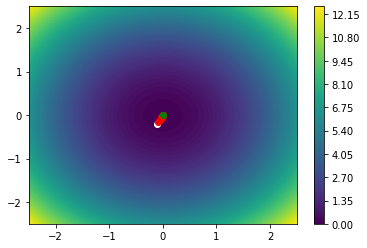

Solucion: [-3.786862038579562e-50, -7.029522845320086e-50] 6.375451553211196e-99


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje
TA=.1 

#Iteraciones
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

##Parte individual

###Fuerza bruta
Resolución por fuerza bruta:

In [ ]:
import itertools

def fuerza_bruta(COSTES):

  n=len(COSTES)
  menor_coste=9999999
  mejor_opcion=[]
  lista1=[x for x in range(n)]
  #print(lista1)
  lista2=list(itertools.permutations(lista1))
  #print(lista2)
  #print(lista2)

  for i in lista2:
    #print(i)
    coste=valor(i,COSTES)
    #print(coste)
    if coste<menor_coste:
      menor_coste=coste
      mejor_opcion=i
  print(menor_coste,mejor_opcion)

fuerza_bruta(COSTES)

61 (0, 2, 3, 1)


El tiempo de ejecución de itertools.permutations() es de complejidad n (lineal), pero el número de listas que genera es n!, por lo que la función completa tiene complejidad factorial.

En el caso de la función de ramificación y poda creo que el orden de complejidad es cuadrática, por lo que nos va a permitir operar con dimensiones mucho mayores que el método de fuerza bruta.

###Crear matriz de mayor tamaño:

In [ ]:
import numpy as np

n=10

COSTES2=np.random.randint(40, size=(n, n))
print(COSTES2)

[[ 0 25  9 21 17 35 31  1 31  6]
 [12 25 37 23 38 37 34 13 13 16]
 [11  7 29  6 28 12  6 12 15 32]
 [31 35 30  0 19 19 23 13 19 32]
 [31  2 13 32 39 26 21 37 11 27]
 [10 37 26 33  7 30 25 12 16 27]
 [ 8 28 31 30 35 21  8 37  3 29]
 [26  5 13  9 26 11 38 19 18 25]
 [34  0 33 16 20 14 11 13 37 15]
 [32 37 33  1 38 32 38 12 34 24]]


In [ ]:
import time

start_time=time.time()

fuerza_bruta(COSTES2)

print("--- %s seconds ---" % (time.time() - start_time))

68 (0, 9, 6, 3, 2, 4, 8, 5, 1, 7)
--- 19.973151922225952 seconds ---


In [ ]:
start_time=time.time()

ramificacion_y_poda(COSTES2)

print("--- %s seconds ---" % (time.time() - start_time))

La solucion final es: [{'s': (0, 7, 6, 3, 2, 4, 8, 5, 1, 9), 'ci': 77}]  en  2560  iteraciones  para dimension:  10
--- 0.8365662097930908 seconds ---


A vista de los resultados ambos métodos han alcanzado el resultado óptimo, la gran diferencia es el tiempo. Para una matriz cuadrada de dimensión n=10, por fuerza bruta supera los 20 segundos, mientras que por ramificación y poda el tiempo es inferior a un segundo.

Para n=12, por fuerza bruta, la sesión de google colab falla porque se supera el máximo de memoria RAM disponible.

In [ ]:
n=12

COSTES3=np.random.randint(40, size=(n, n))
#print(COSTES3)

In [ ]:
#start_time=time.time()

#fuerza_bruta(COSTES3)

#print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
n=11

COSTES4=np.random.randint(40, size=(n, n))
#print(COSTES4)

In [ ]:
start_time=time.time()

fuerza_bruta(COSTES4)

print("--- %s seconds ---" % (time.time() - start_time))

47 (5, 0, 6, 4, 1, 7, 3, 8, 10, 2, 9)
--- 242.80730152130127 seconds ---


La dimensión máxima que permite google colab por fuerza bruta es n=11.

In [ ]:
n=100

COSTES5=np.random.randint(40, size=(n, n))
#print(COSTES5)

In [ ]:
start_time=time.time()

ramificacion_y_poda(COSTES5)

print("--- %s seconds ---" % (time.time() - start_time))

Para dimensiones de n=100, la plataformas nos permite ejecutar el programa, pero los tiempos de espera son largos. En mi opinión para cualquier dimensionalidad nos va a servir este método pero el tiempo de espera va a ser acorde a dicha dimensionalidad.